In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score

In [2]:
n_samp = 200
clust_std = 0.5

XQ1, YQ1 = \
make_blobs(n_samples= n_samp, 
           centers = [(2, 2)],
           cluster_std= clust_std)

XQ2, YQ2 = \
make_blobs(n_samples= n_samp, 
           centers = [(-2, 2)],
           cluster_std= clust_std)
YQ2 = YQ2 + 1


XQ3, YQ3 = \
make_blobs(n_samples= n_samp, 
           centers = [(-2, -2)],
           cluster_std= clust_std)

XQ4, YQ4 = \
make_blobs(n_samples= n_samp, 
           centers = [(2, -2)],
           cluster_std= clust_std)
YQ4 = YQ4 + 1

X = np.vstack([XQ1, XQ2, XQ3, XQ4])
Y = np.hstack([YQ1, YQ2, YQ3, YQ4])
df_xor = pd.DataFrame(np.c_[X, Y], columns= ['x1', 'x2', 'target'])

X = df_xor[['x1','x2']]
y = df_xor['target']

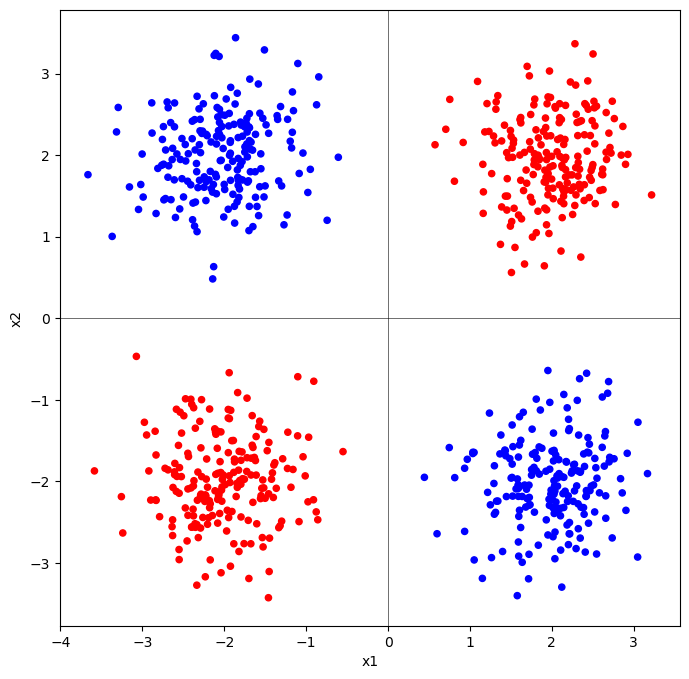

In [3]:
fig, ax = plt.subplots(1, 1, figsize= (8, 8))

df_xor.plot.scatter(x= 'x1', y= 'x2', 
                    c= df_xor['target'].map({0:'red',1:'blue'}),
                    ax= ax)
ax.axhline(0, color='k', linewidth= 0.4)
ax.axvline(0, color='k', linewidth= 0.4)
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


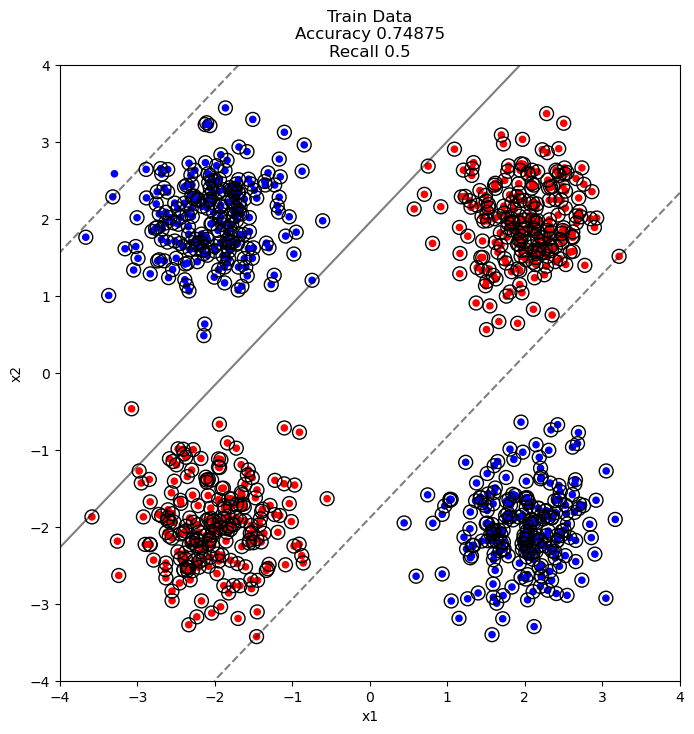

In [4]:
svm_lin = svm.SVC(kernel= 'linear')
svm_lin.fit(X, y)

xx = np.linspace(np.floor(X.x1.min()),
                 np.ceil(X.x1.max()))
yy = np.linspace(np.floor(X.x2.min()),
                 np.ceil(X.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_lin.decision_function(xy).reshape(XX.shape)

fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (8, 8))
X.plot.scatter(x= 'x1', y= 'x2', 
               c= y.map({0:'red', 1:'blue'}),
               ax= ax)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y, y_pred= svm_lin.predict(X))}\nRecall {np.round(recall_score(y_true= y, y_pred= svm_lin.predict(X)), 10)}')

plt.show()

In [5]:
df_xor['x1_proj'] = df_xor.x1**2
df_xor['x2_proj'] = df_xor.x2**2
df_xor['x3_proj'] = np.sqrt(2) * df_xor.x1 * df_xor.x2

In [6]:
df_xor

,x1,x2,target,x1_proj,x2_proj,x3_proj
0,1.805714,2.309654,0.0,3.260602,5.334503,5.898083
1,1.457066,1.497157,0.0,2.123043,2.241478,3.085046
2,1.470784,1.968533,0.0,2.163205,3.875123,4.094554
3,2.043342,2.575621,0.0,4.175246,6.633825,7.442829
4,1.738810,1.481928,0.0,3.023460,2.196109,3.644132
...,...,...,...,...,...,...
795,1.033927,-1.659260,1.0,1.069005,2.753144,-2.426159
796,1.397909,-2.860454,1.0,1.954151,8.182195,-5.654952
797,1.589522,-2.087252,1.0,2.526582,4.356620,-4.691984
798,1.425589,-1.616570,1.0,2.032303,2.613297,-3.259145


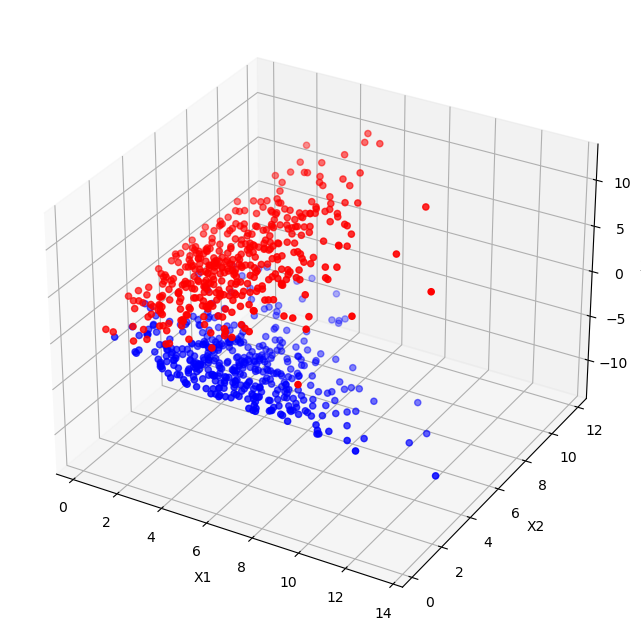

In [7]:
fig = plt.figure(figsize= (8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_xor.x1_proj, df_xor.x2_proj, df_xor.x3_proj, c= df_xor['target'].map({0:'red',1:'blue'}))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


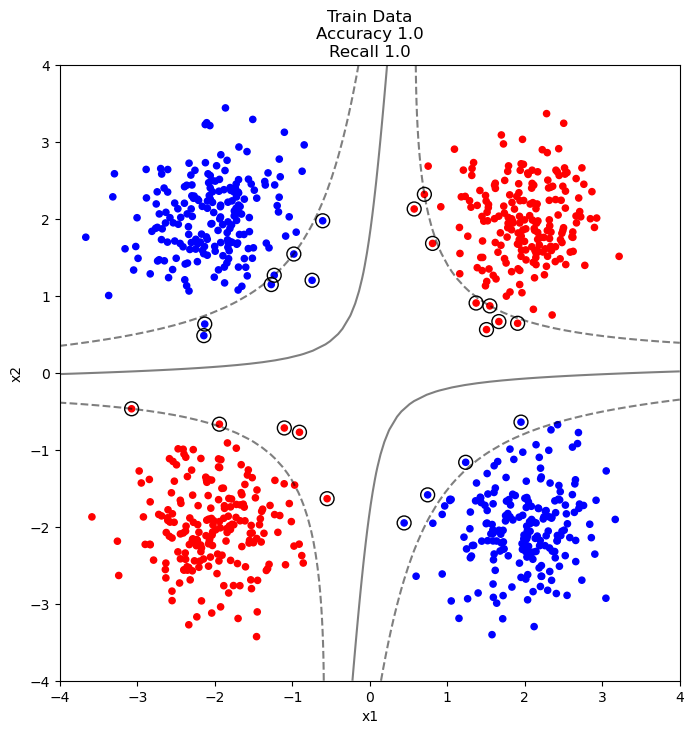

In [8]:
svm_poly = svm.SVC(kernel= 'poly', degree= 2)
svm_poly.fit(X, y)
%matplotlib inline
xx = np.linspace(np.floor(X.x1.min()),
                 np.ceil(X.x1.max()))
yy = np.linspace(np.floor(X.x2.min()),
                 np.ceil(X.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_poly.decision_function(xy).reshape(XX.shape)

fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (8, 8))
X.plot.scatter(x= 'x1', y= 'x2', 
               c= y.map({0:'red', 1:'blue'}),
               ax= ax)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y, y_pred= svm_poly.predict(X))}\nRecall {np.round(recall_score(y_true= y, y_pred= svm_poly.predict(X)), 10)}')

plt.show()